# Classical kernel (RBF) Support Vector Machine classifier

The tutorial presents an example of applying the classical kernel Support Vector Machine (SVM) algorithm to a problem of binary classification for a simple 2-dimensional sythetic dataset.
As a classical kernel we employ the widely used Radial Basis Function (RBF) kernel.
As it follows from definition, the RBF kernel has a single hyperparameter $\gamma$.
The second hyperparameter, the regularization constant `C`, comes from the SVM algorithm itself.
To optimize the hyperparameters and reach the maximum accuracy score, we are applying the common approach based on the Scikit-Learn `GridSearchCV`.
The classification performance of the obtained classical kernel SVC model is used for comparison with the quantum kernel version of SVM (see corresponding notebooks).

In [2]:
import numpy as np

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

from common import generate_moons_dataset
from common import visualize_decision_boundaries
from common import print_scores

seed = 12345

# Dataset

The [moons dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) is chosen for the demonstration purposes.
This dataset has non-trivial and non-linear decision boundaries such that no separating hyperplane could be found to perfectly split 2 data classes.

Following the standard machine learning (ML) practice, we generate 2 independent datasets. The first dataset (`X_train`=($x_1$, $x_2$) - the 2d cartesian coordinates, and `y_train`={0, 1} - the datapoint labels) is used for training the chosen model and optimizing the model hyperparameters.
The second dataset `(X_test, y_test)` serves to crosscheck the accuracy of the model on previously unseen datapoints (thus testing the model generalization performance).

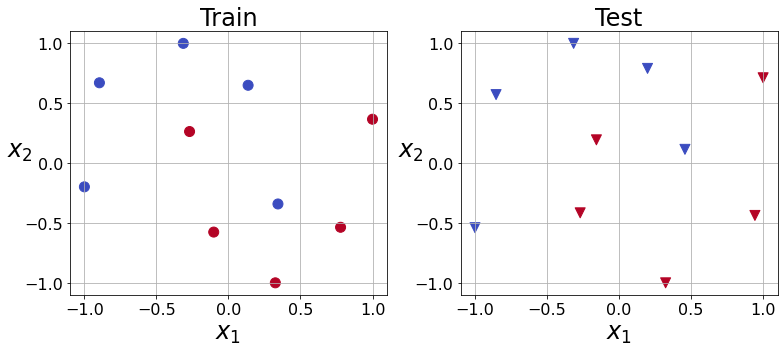

(10, 2)
(10, 2)


In [3]:
X_train, y_train, X_test, y_test = generate_moons_dataset()
print(X_train.shape)
print(X_test.shape)

# RBF SVC

Best grid search parameters: {'C': 2, 'gamma': 0.25}
Best training score: 0.8

Prediction Scores:

		Train	Test
Accuracy:	0.80	0.80
 ROC_AUC:	0.80	0.80



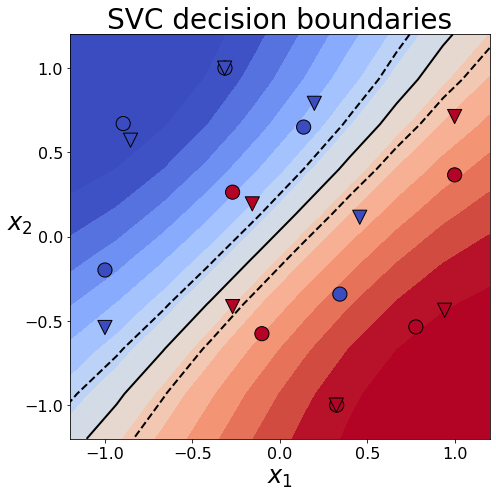

In [4]:
param_grid = {
    "gamma": [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 5.0, 10.0],
    "C": [1, 2, 4, 6, 8, 10, 100],
}

gs = GridSearchCV(
    estimator=SVC(kernel='rbf'),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=4,
    cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=seed),
)
gs.fit(X_train, y_train)

print('Best grid search parameters:', gs.best_params_)
print('Best training score:', gs.best_score_)
clf = gs.best_estimator_

clf.fit(X_train, y_train)
print_scores(clf, X_train, y_train, X_test, y_test)
visualize_decision_boundaries(clf, X_train, y_train, X_test, y_test)

The accuracy score could be treated as a percentage of the data points that are correctly classified.
It lies between 0 (everything misclassified) and 1 (perfect classification).
We see that the computed accuracy scores for both the training and test dataset are 0.8.
Is it good or bad value? Unfortunately, the accuracy score alone does not provide us a feeling how good or reliable our model is.

For low dimensional datasets, one could select a volume in the original feature space, which covers the studied dataset, and color it based on the predicted labels obtained from the found classification model.
In this way, we can visualize the classification pattern and intuitively judge about the generalization capabilities of the model.
Instead of the binary labels, one often uses the so-called decision function that could be treated as a probability of a given datapoint to belong to a particular class.
In the case of SVM, the decision function is determined with respect to the distance between the point and the decision/separating hyperplane.
In the shown decision function heat map plot, we can clearly see an almost linear decision border between 0 (blue) and 1 (red) classes (black solid line). -0.2 and +0.2 margins from the decision hyperplane are also indicated with the dash lines.
Circles and triangles indicate the points in the train and test datasets, correspondingly.
Now, the figure gives us a clear indicator about the generalization performance of the computed model. As we can easily see, instead of the expected "arc" or "moon"-like shapes, the data space is simply split along the diagonal.

In the discussed case, the rather decent generalization performance of the RBF-SVC model is essentially due to the extremely low number of the training points, which significantly influences the grid search procedure.
The results shown in this notebook only serve to provide a baseline for comparison between classical and quantum kernel SVC.